# Data Understanding

### Apa Itu Data Understanding?

**Data Understanding** (Pemahaman Data) adalah tahap kedua dalam metodologi CRISP-DM (Cross-Industry Standard Process for Data Mining) dan merupakan fase kritis dalam siklus hidup data science atau analisis data apa pun. Ini adalah proses mendalam untuk mengenali karakteristik, kualitas, dan pola awal dari data yang telah dikumpulkan sebelum melakukan pemrosesan lebih lanjut, pemodelan, atau pengambilan keputusan.

Intinya, Data Understanding adalah upaya untuk "berkenalan" dengan data Anda. Seperti seorang detektif yang memeriksa semua bukti sebelum menyelesaikan kasus, seorang analis data harus sepenuhnya memahami data mereka sebelum dapat menarik wawasan yang valid darinya.

---

### Pentingnya Memahami Data yang Kita Ambil

Memahami data bukanlah langkah formalitas, tetapi fondasi dari seluruh analisis. Kesalahan dalam memahami data akan berakibat fatal pada tahap selanjutnya.

1. Menghindari Kesimpulan yang Salah (Garbage In, Garbage Out): Jika data tidak dipahami dengan benar, model atau analisis yang dihasilkan akan cacat dan kesimpulan yang ditarik bisa menyesatkan.

2. Memilih Teknik Analisis yang Tepat: Jenis data yang berbeda (numerik, kategorikal) memerlukan teknik statistik, visualisasi, dan algoritma machine learning yang berbeda. Memahami jenis variabel membantu memilih metode yang tepat.

3. Mengidentifikasi Masalah Data Lebih Awal: Tahap ini memungkinkan kita menemukan anomali seperti data yang hilang (missing values), outlier (nilai ekstrem), atau ketidakkonsistenan sejak dini, sehingga dapat ditangani sebelum analisis.

4. Membangun Hipotesis yang Bermakna: Dengan mengeksplorasi data, kita dapat mulai melihat pola, hubungan, dan tren yang dapat membentuk pertanyaan penelitian atau hipotesis yang lebih terfokus.

5. Mengkomunikasikan Temuan dengan Efektif: Pemahaman yang mendalam tentang data memungkinkan analis untuk menjelaskan hasil dan keterbatasan analisis kepada pemangku kepentingan (stakeholders) dengan lebih jelas dan meyakinkan.

---

### Observasi dari Data dan Jenis-Jenis Variabel

Saat pertama kali melihat sebuah dataset, kita melakukan observasi untuk mengidentifikasi jenis setiap variabel (kolom). Klasifikasi variabel sangat penting.

---

### Ekplorasi Data (dengan python)

In [29]:
# ================================
# 1. Import Library
# ================================

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
from dotenv import load_dotenv

sns.set(style='whitegrid')

In [30]:
# ================================
# 2. Connect to Supabase, create table and insert data from csv file
# ================================

# Load environment variables
load_dotenv()

USER = os.getenv("user")
PASSWORD = os.getenv("password")
HOST = os.getenv("host")
PORT = os.getenv("port")
DBNAME = os.getenv("dbname")

try:
    connection = psycopg2.connect(
        user=USER,
        password=PASSWORD,
        host=HOST,
        port=PORT,
        dbname=DBNAME
    )
    cursor = connection.cursor()
    print("✅ Connection successful!")

    # Cek apakah tabel 'student_stress_level' sudah ada
    cursor.execute("""
        SELECT EXISTS (
            SELECT FROM information_schema.tables 
            WHERE table_name = 'student_stress_level'
        );
    """)
    table_exists = cursor.fetchone()[0]

    if not table_exists:
        print("ℹ️ Tabel belum ada, membuat tabel baru...")
        cursor.execute("""
            CREATE TABLE student_stress_level (
                id SERIAL PRIMARY KEY,
                anxiety_level INT,
                self_esteem INT,
                mental_health_history INT,
                depression INT,
                headache INT,
                blood_pressure INT,
                sleep_quality INT,
                breathing_problem INT,
                noise_level INT,
                living_conditions INT,
                safety INT,
                basic_needs INT,
                academic_performance INT,
                study_load INT,
                teacher_student_relationship INT,
                future_career_concerns INT,
                social_support INT,
                peer_pressure INT,
                extracurricular_activities INT,
                bullying INT,
                stress_level INT
            );
        """)
        connection.commit()
        print("✅ Tabel student_stress_level berhasil dibuat")

    # Import CSV
        with open("data/StressLevelDataset.csv", "r", encoding="utf-8") as f:
            next(f)  # skip header
            cursor.copy_from(
                f, 
                "student_stress_level", 
                sep=",", 
                columns=(
                "anxiety_level",
                "self_esteem",
                "mental_health_history",
                "depression",
                "headache",
                "blood_pressure",
                "sleep_quality",
                "breathing_problem",
                "noise_level",
                "living_conditions",
                "safety",
                "basic_needs",
                "academic_performance",
                "study_load",
                "teacher_student_relationship",
                "future_career_concerns",
                "social_support",
                "peer_pressure",
                "extracurricular_activities",
                "bullying",
                "stress_level"
            ))

        connection.commit()
        print("✅ Data berhasil diimport ke Supabase")
    print("✅ Table sudah ada")

    cursor.close()
    connection.close()

except Exception as e:
    print(f"❌ Failed: {e}")


✅ Connection successful!
ℹ️ Tabel belum ada, membuat tabel baru...
✅ Tabel student_stress_level berhasil dibuat
✅ Data berhasil diimport ke Supabase
✅ Table sudah ada


In [31]:
# ================================
# 3. Read data from Supabase
# ================================

try:
    connection = psycopg2.connect(
        user=USER,
        password=PASSWORD,
        host=HOST,
        port=PORT,
        dbname=DBNAME
    )
    query = 'SELECT * FROM student_stress_level;'
    df = pd.read_sql(query, connection)

    connection.close()
    print("✅ Data berhasil diambil, jumlah baris", len(df))
    print(df.head())
    
except Exception as e:
    print(f"❌ Failed: {e}")

C:\Users\risqi\AppData\Local\Temp\ipykernel_22056\313617342.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


✅ Data berhasil diambil, jumlah baris 1100
   id  anxiety_level  self_esteem  mental_health_history  depression  \
0   1             14           20                      0          11   
1   2             15            8                      1          15   
2   3             12           18                      1          14   
3   4             16           12                      1          15   
4   5             16           28                      0           7   

   headache  blood_pressure  sleep_quality  breathing_problem  noise_level  \
0         2               1              2                  4            2   
1         5               3              1                  4            3   
2         2               1              2                  2            2   
3         4               3              1                  3            4   
4         2               3              5                  1            3   

   ...  basic_needs  academic_performance  study_load  

📌 Penjelasan:

- konek ke database Supabase PostgreSQL menggunakan psycopg2.
- Data disimpan dalam pandas DataFrame (df) supaya mudah diolah.
- df.head() menampilkan 5 baris pertama.

---

In [32]:
# ================================
# 4. Eksplorasi Struktur Data
# ================================

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   id                            1100 non-null   int64
 1   anxiety_level                 1100 non-null   int64
 2   self_esteem                   1100 non-null   int64
 3   mental_health_history         1100 non-null   int64
 4   depression                    1100 non-null   int64
 5   headache                      1100 non-null   int64
 6   blood_pressure                1100 non-null   int64
 7   sleep_quality                 1100 non-null   int64
 8   breathing_problem             1100 non-null   int64
 9   noise_level                   1100 non-null   int64
 10  living_conditions             1100 non-null   int64
 11  safety                        1100 non-null   int64
 12  basic_needs                   1100 non-null   int64
 13  academic_performance          110

📌 Penjelasan:

- df.info() memberikan info jumlah baris, tipe data, dan kolom.
- describe() memberikan statistik (mean, std, min, max, dll).

---

In [33]:
print(df.isnull().sum())

id                              0
anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64


📌 Penjelasan:

- Penting untuk cek apakah ada missing value.

---

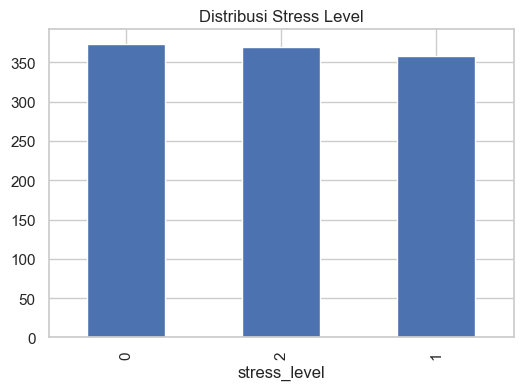

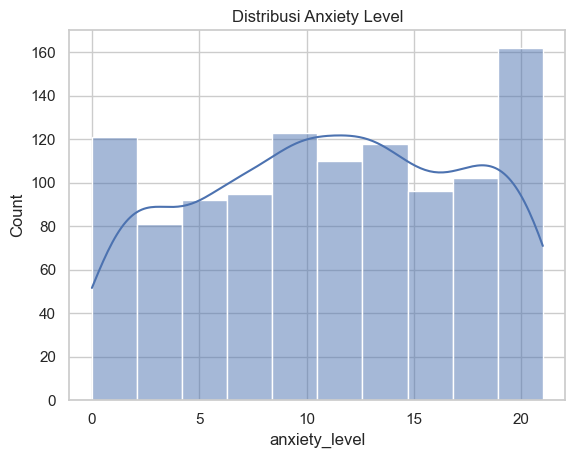

: 

In [ ]:
# ================================
# 5. Analisis Distribusi Variabel
# ================================

# Contoh distribusi stress_level
df["stress_level"].value_counts().plot(kind="bar", figsize=(6,4), title="Distribusi Stress Level")
plt.show()

# Contoh distribusi anxiety_level
sns.histplot(df["anxiety_level"], bins=10, kde=True)
plt.title("Distribusi Anxiety Level")
plt.show()

📌 Penjelasan:

- Visualisasi awal → apakah data seimbang atau ada kelas yang dominan.
- Bisa pakai bar chart (untuk kategori) atau histogram (untuk angka).

---

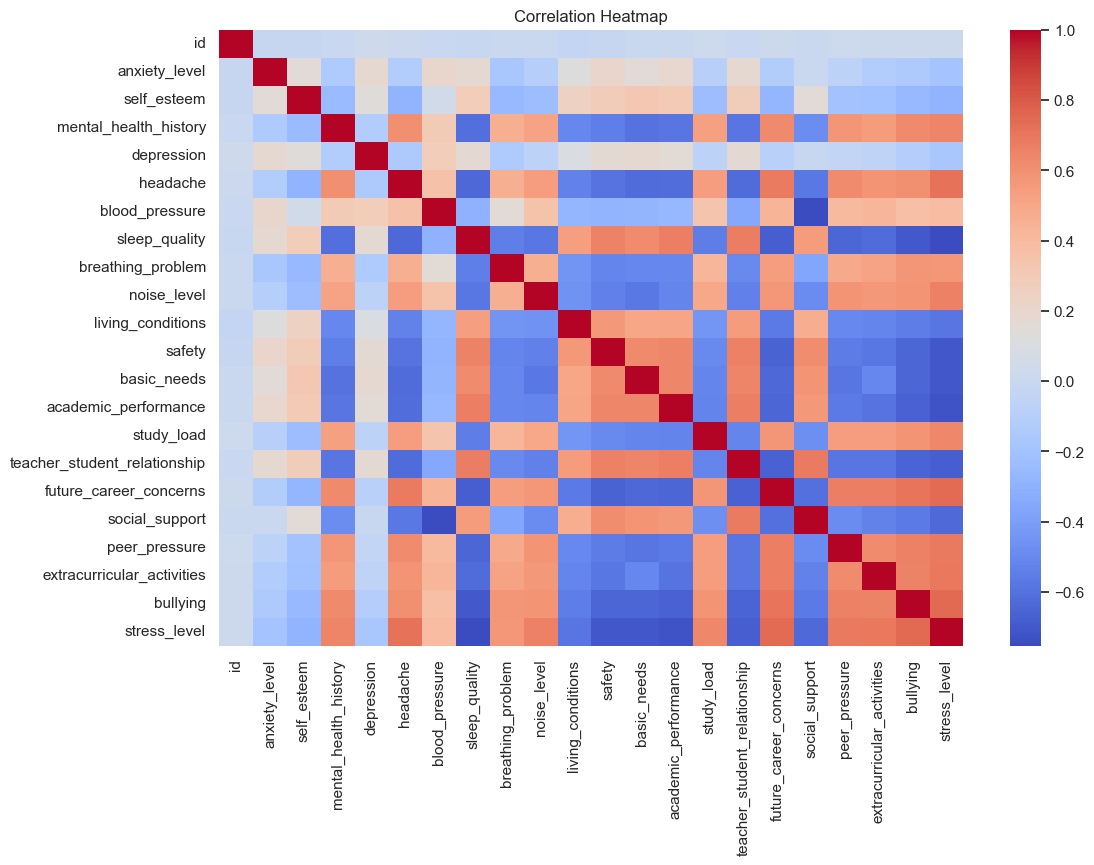

In [ ]:
# ================================
# 6. Analisis Korelasi Antar Variabel
# ================================

# Encode kategori jadi angka agar bisa dihitung korelasi
df_encoded = df.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))

# Korelasi Pearson
corr = df_encoded.corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()


📌 Penjelasan:

- Karena ada kolom kategori, kita encode dulu ke angka.
- Korelasi membantu lihat hubungan, misalnya apakah depression sejalan dengan anxiety_level.
- Heatmap memudahkan spotting variabel yang saling berkaitan.

---

Jumlah outlier di self_esteem: 0


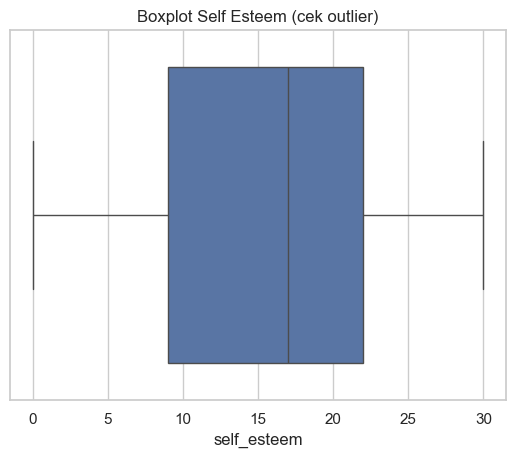

In [26]:
# ================================
# 7. Deteksi Outlier (IQR Method)
# ================================
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Contoh cek outlier pada self_esteem
outliers = detect_outliers_iqr(df_encoded, "self_esteem")
print("Jumlah outlier di self_esteem:", len(outliers))

# Visualisasi boxplot
sns.boxplot(x=df_encoded["self_esteem"])
plt.title("Boxplot Self Esteem (cek outlier)")
plt.show()


📌 Penjelasan:

- IQR Method digunakan untuk deteksi outlier.
- Boxplot membantu melihat apakah ada nilai ekstrim.

---

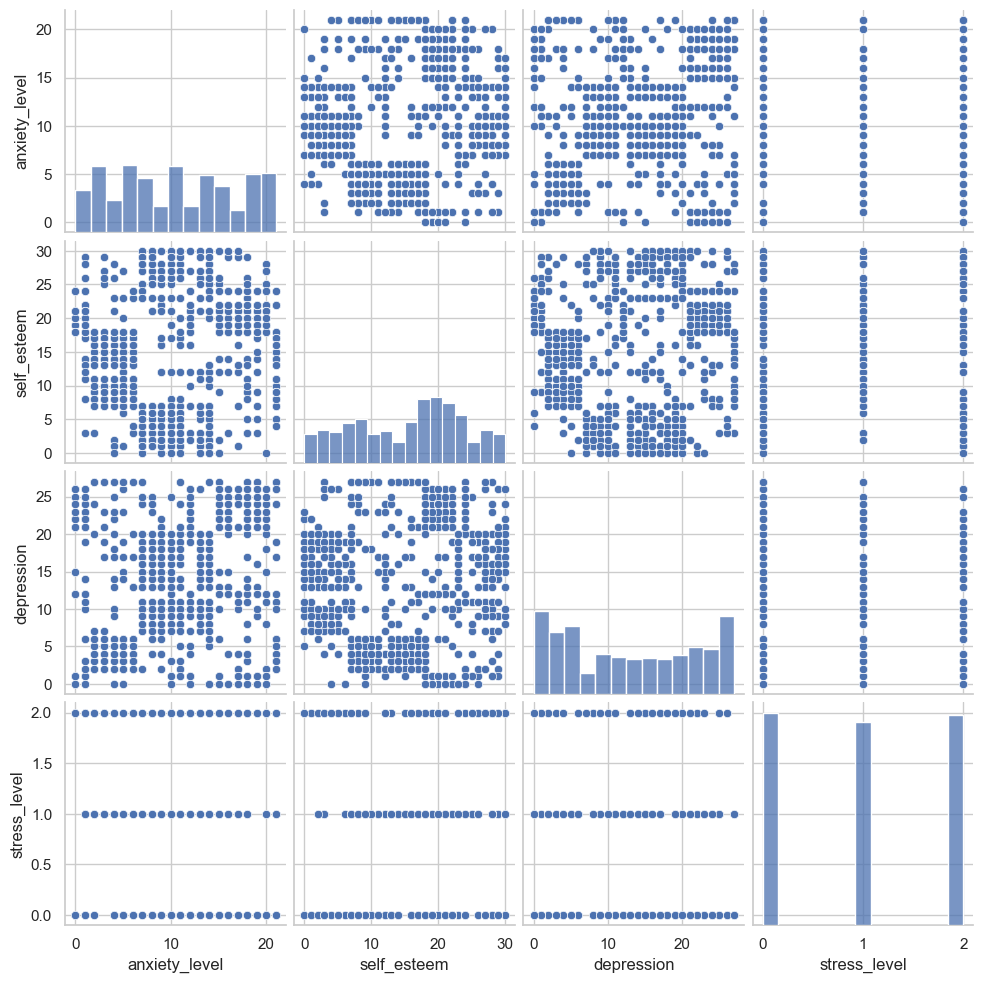

In [27]:
# ================================
# 8. Pairplot (Hubungan antar variabel penting)
# ================================
sns.pairplot(df_encoded[["anxiety_level", "self_esteem", "depression", "stress_level"]])
plt.show()


📌 Penjelasan:

- Pairplot = scatterplot + histogram antar variabel.
- Bagus untuk lihat pola hubungan linear/non-linear antar faktor psikologis & stress.

---

### Ekplorasi Data (dengan Power BI)

Get data menggunakan script python di Power BI

- Masuk Power BI
- klik Get data > python script
- paste code dibawah ini


In [2]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

load_dotenv()

USER = os.getenv("user")
PASSWORD = os.getenv("password")
HOST = os.getenv("host")
PORT = os.getenv("port")
DBNAME = os.getenv("dbname")

engine = create_engine(f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}")

query = "SELECT * FROM student_stress_level;"
df = pd.read_sql(query, engine)

dataset = df


![deskripsi gambar](images/load-data.png)

- Checklist dataset dan load
- tunggu proses load selesai

![deskripsi gambar](images/image-from-connect-using-python.png)

In [ ]:
import pandas as pd
from sqlalchemy import create_engine

USER = "root"
PASSWORD = ""
HOST = "localhost"
PORT = 3306
DBNAME = "iris_dataset"

# Buat koneksi ke MySQL (pakai driver PyMySQL)
engine = create_engine(f"mysql+pymysql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}")

# Query ke database MySQL
query = "SELECT * FROM iris;"
df = pd.read_sql(query, engine)

dataset = df

![gambar dari 2 database](images/image-from-2-database.png)
